In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Display top 5 rows of the dataset. 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display bottom 5 rows of the dataset. 
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Display total no. of rows and columns
print('Rows,Column:',titanic.shape)

Rows,Column: (891, 12)


In [6]:
#Display the feature names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# returns the total number of unique values for each variable.
titanic.nunique().to_frame("Total No. of Unique Values in each column")

,Total No. of Unique Values in each column
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [8]:
#Display the dtype and non null values of dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Key Observation:There are total 891 entries(rows) with 12 columns with integer64, float64 and object datatypes of variables.
    Here the Name,Sex,Ticket,Cabin and Embarked have object dtype; fare and age as float64 datatype rest others integer64 datatype.
    Null values is present in Age,Cabin and Embarked column.

In [9]:
# Seperating categorical columns from numerical columns
categorical_data = []
numerical_data = []
for i in titanic.columns:
    if titanic[i].dtype=='object':
        categorical_data.append(i)
    else:
        numerical_data.append(i)
print("The Categorical Data is present in columns: \n",*categorical_data,sep='\n')
print("\n The Numerical Data is present in columns: \n",*numerical_data,sep='\n')

The Categorical Data is present in columns: 

Name
Sex
Ticket
Cabin
Embarked

 The Numerical Data is present in columns: 

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [10]:
#Display % of perople survived
survived =titanic.Survived.sum()
died =len(titanic)-survived
print( survived, 'Number of people survived.')
print( died, 'Number of people did not survive.')
print('Percentage of people Survived',(titanic.Survived.sum()/len(titanic))*100)

342 Number of people survived.
549 Number of people did not survive.
Percentage of people Survived 38.38383838383838


#more than 60% percent of passengers have died

# Checking Null Values

In [11]:
#Checking Null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

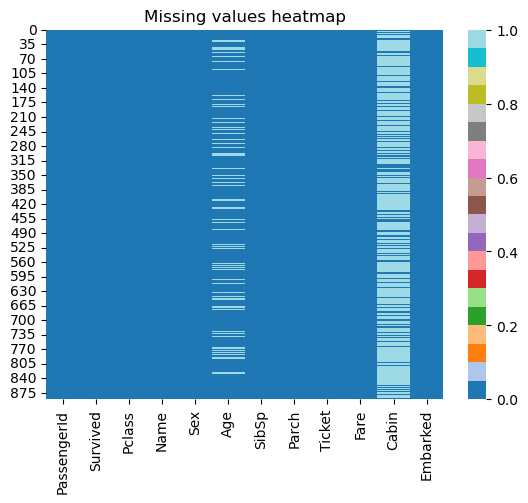

In [12]:
#Plotting Null values
sns.heatmap(titanic.isnull(),cmap = 'tab20').set_title("Missing values heatmap")

In [13]:
print((titanic.isnull().sum()/len(titanic))*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


20% of age data and 80% of cabin data is missing

As the null values present in Cabin are really high, we will drop this column and for Age we will use mean/median to fill the null values and for Embarked we can use mode.

# Data Visualization

0    549
1    342
Name: Survived, dtype: int64

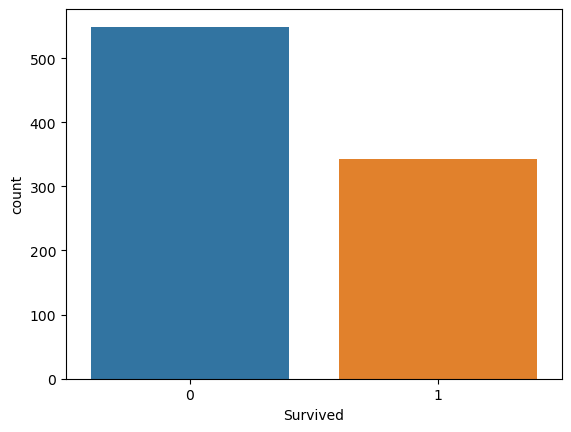

In [14]:
sns.countplot(x='Survived',data= titanic)
titanic['Survived'].value_counts()

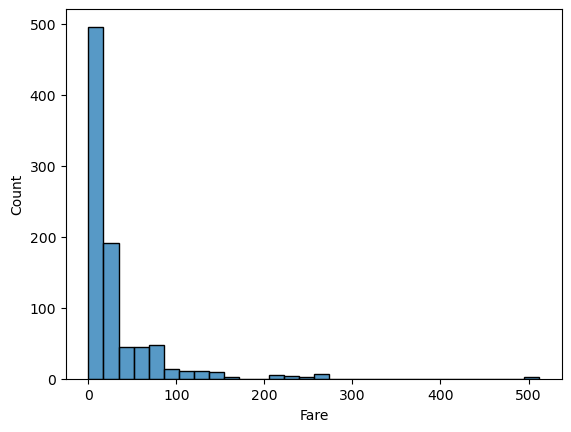

In [48]:
sns.histplot(data=titanic, x="Fare", bins = 30);

With this histogram this we can find that cheaper tickets were sold and most passengers were on lower class.

Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
dtype: int64

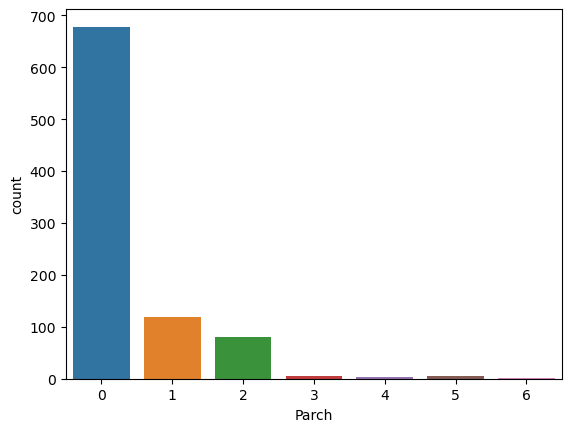

In [29]:
sns.countplot(x='Parch',data=titanic)
titanic.value_counts('Parch')

Here we can see that majority of the passengers were single.Second highest were passengers with their 1 child.

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

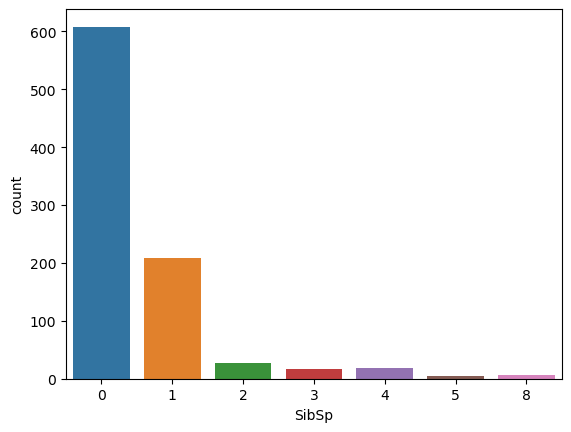

In [28]:
sns.countplot(x = 'SibSp',data = titanic)
titanic.value_counts('SibSp')

Here we can see that majority of the passengers were single.
And second highest were passengers with their 1 sibling or spouse

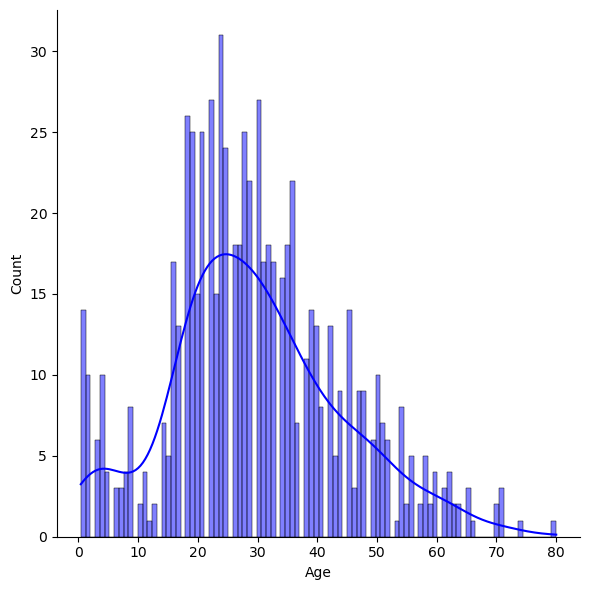

In [41]:
sns.displot(data=titanic, x="Age", kde=True, bins = 100,color = "blue",height = 6);

<AxesSubplot:xlabel='Age', ylabel='Density'>

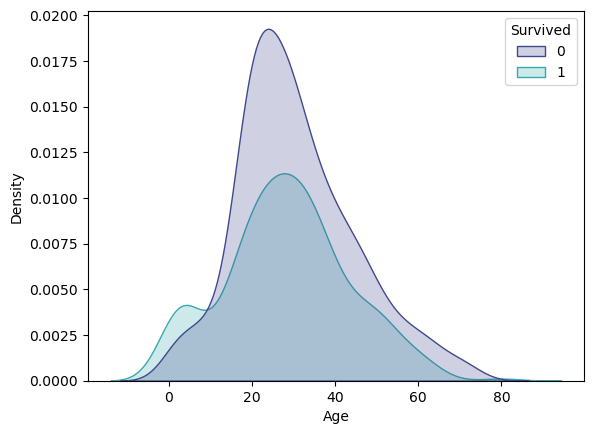

In [53]:
sns.kdeplot(data=titanic,x='Age',hue='Survived',palette='mako',fill=True)

Most of the passenger who survived were in their late 20s or early 30s i.e around age = 30

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

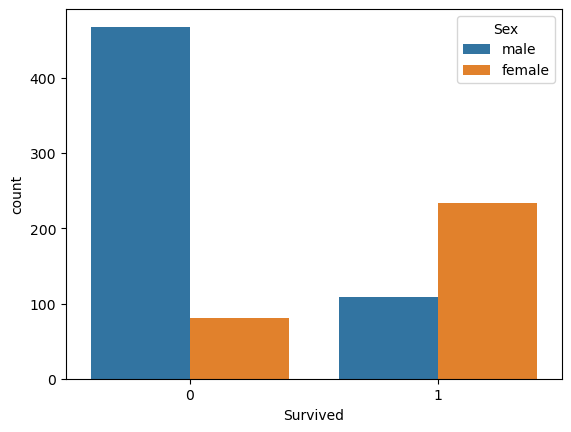

In [27]:
sns.countplot(x='Survived',hue='Sex',data=titanic)
titanic.value_counts(['Survived','Sex'])

out of all passengers:
    People who survived includes: male = 109 and female = 233,
    People who died includes: male = 468 and female = 81

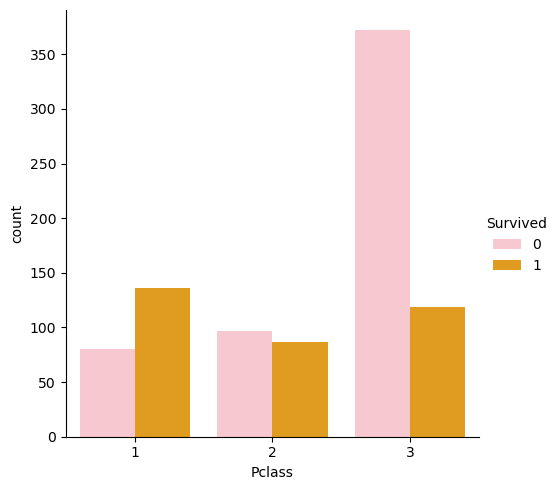

In [18]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=titanic, palette=sns.color_palette(['pink', 'orange']))

With help of this graph we can see that the large number of the 3rd class or say lower class people did not survived.

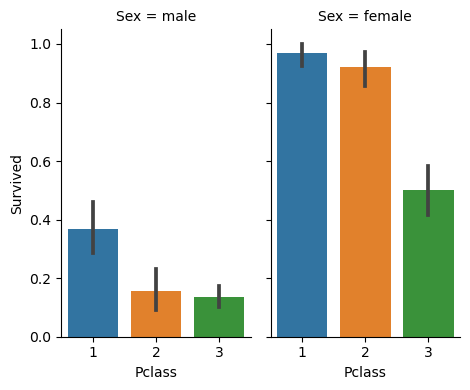

In [51]:
sns.catplot(data=titanic, x="Pclass", y="Survived", col="Sex",kind="bar", height=4, aspect=.6)

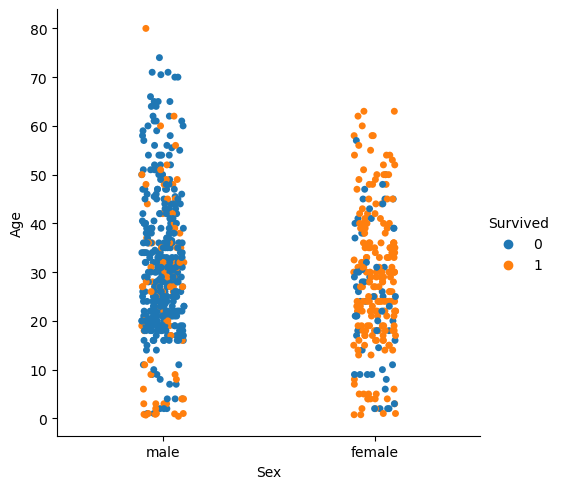

In [39]:
sns.catplot(data=titanic,x='Sex',y='Age',hue='Survived')

most of the people who survived were female of different age groups.

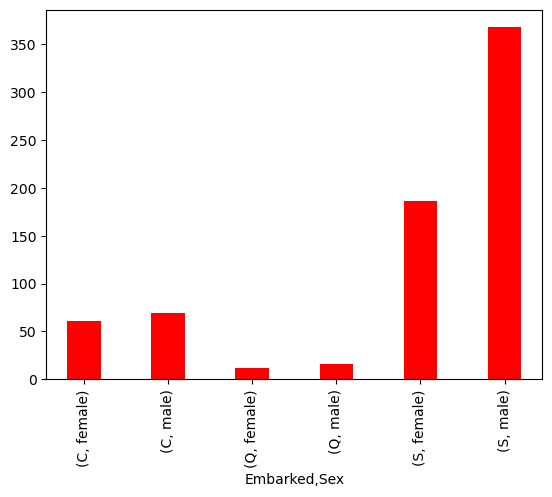

In [20]:
color = plt.cm.copper(np.linspace(0, 1, 10))
titanic.groupby(['Embarked','Sex'])['Age'].count().plot(kind='bar', width=.4,color='red');

---------------Feature: Sex ----------------

 Survived :
 female    233
male      109
Name: Sex, dtype: int64


Dead :
 male      468
female     81
Name: Sex, dtype: int64
-----------------------------------------------
---------------Feature: Pclass ----------------

 Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64


Dead :
 3    372
2     97
1     80
Name: Pclass, dtype: int64
-----------------------------------------------
---------------Feature: SibSp ----------------

 Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


Dead :
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64
-----------------------------------------------
---------------Feature: Parch ----------------

 Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


Dead :
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64
-----------------------------------------

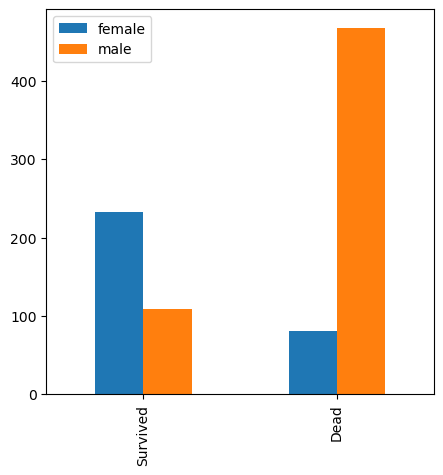

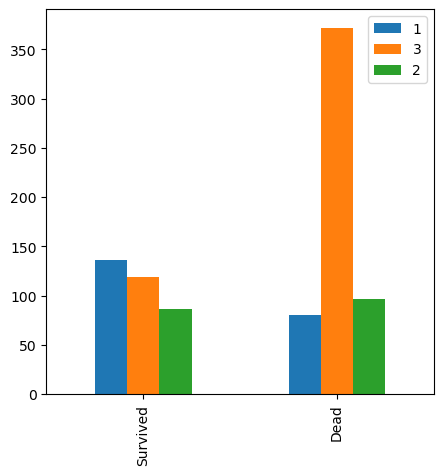

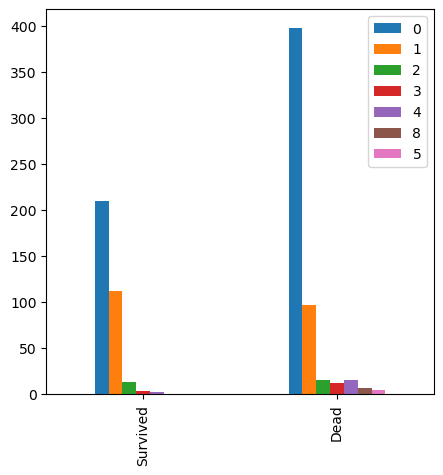

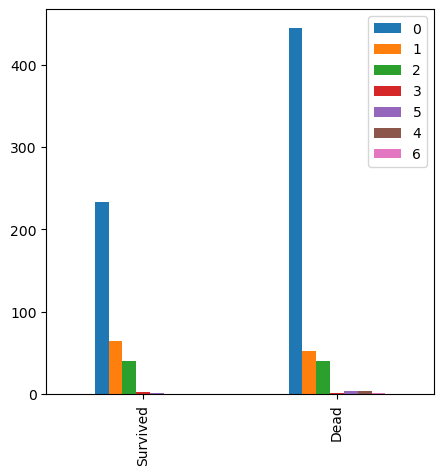

In [147]:
feature = ['Sex','Pclass','SibSp','Parch']
for i in feature:
    def Barplot(feature):
        print('---------------Feature:', i,'----------------')
        s=titanic[titanic['Survived']==1][feature].value_counts()
        print("\n Survived :\n",titanic[titanic['Survived']==1][feature].value_counts())
        print('\n')
        d=titanic[titanic['Survived']==0][feature].value_counts()
        print("Dead :\n",titanic[titanic['Survived']==0][feature].value_counts())
        print('-----------------------------------------------')
        new=pd.DataFrame([s,d])
        new.index=['Survived','Dead']
        new.plot(kind='bar',stacked=False,figsize=(5,5))
       
    Barplot(i)
    

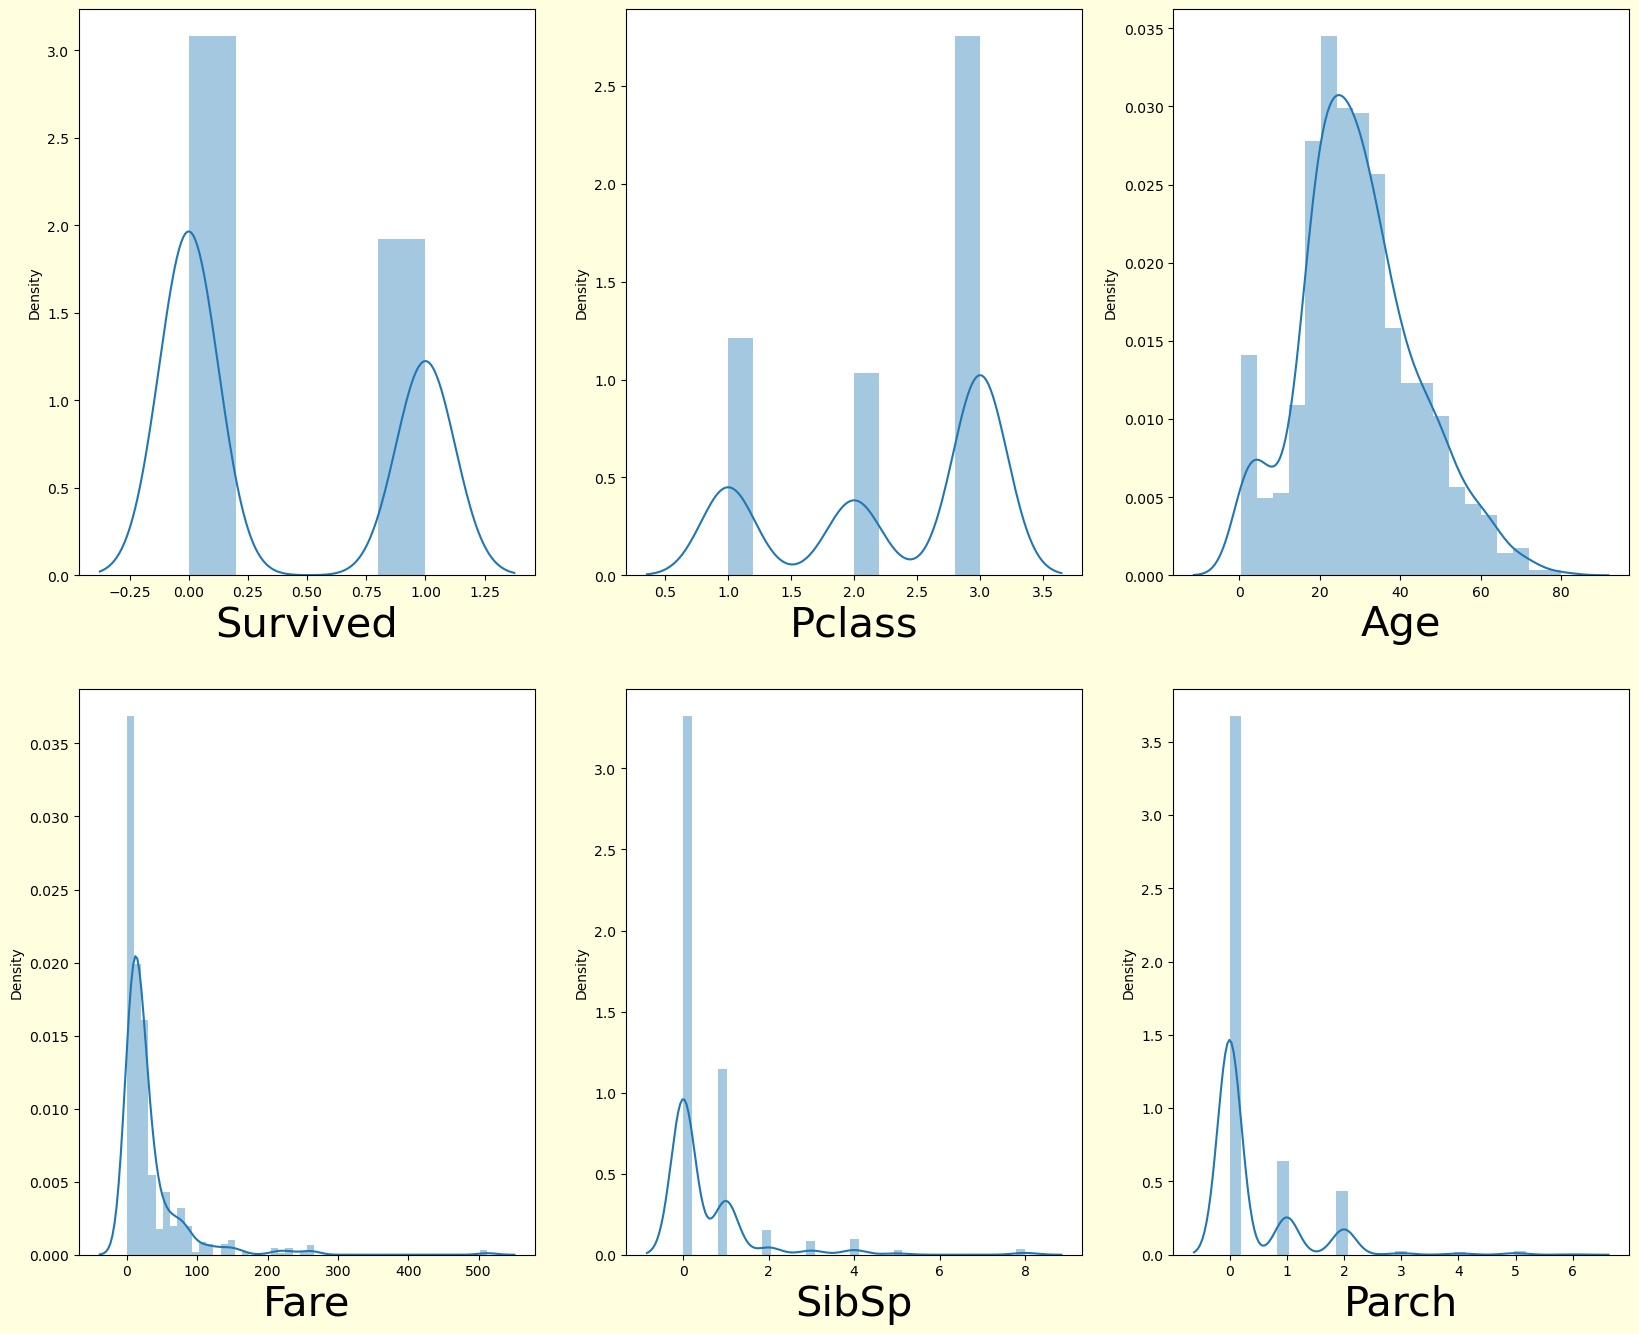

In [65]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotno=1
col = ['Survived','Pclass','Age','Fare','SibSp','Parch']
for i in col:
    if plotno<=12:
        ax=plt.subplot(3,3,plotno)
        sns.distplot(titanic[i])
        plt.xlabel(i,fontsize=30)
        
    plotno+=1

PassengerId       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Survived       AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Pclass         AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Age               AxesSubplot(0.125,0.381765;0.227941x0.226471)
SibSp          AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Parch          AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Fare                  AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

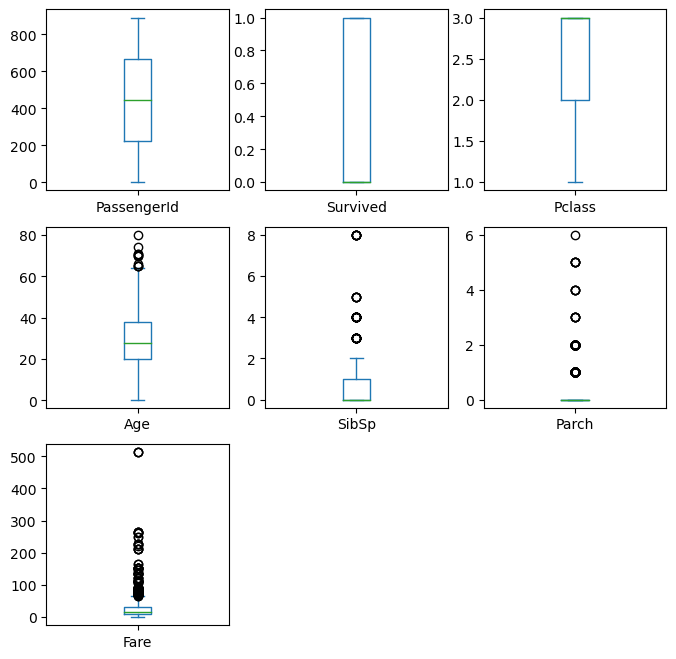

In [78]:
titanic.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,8))

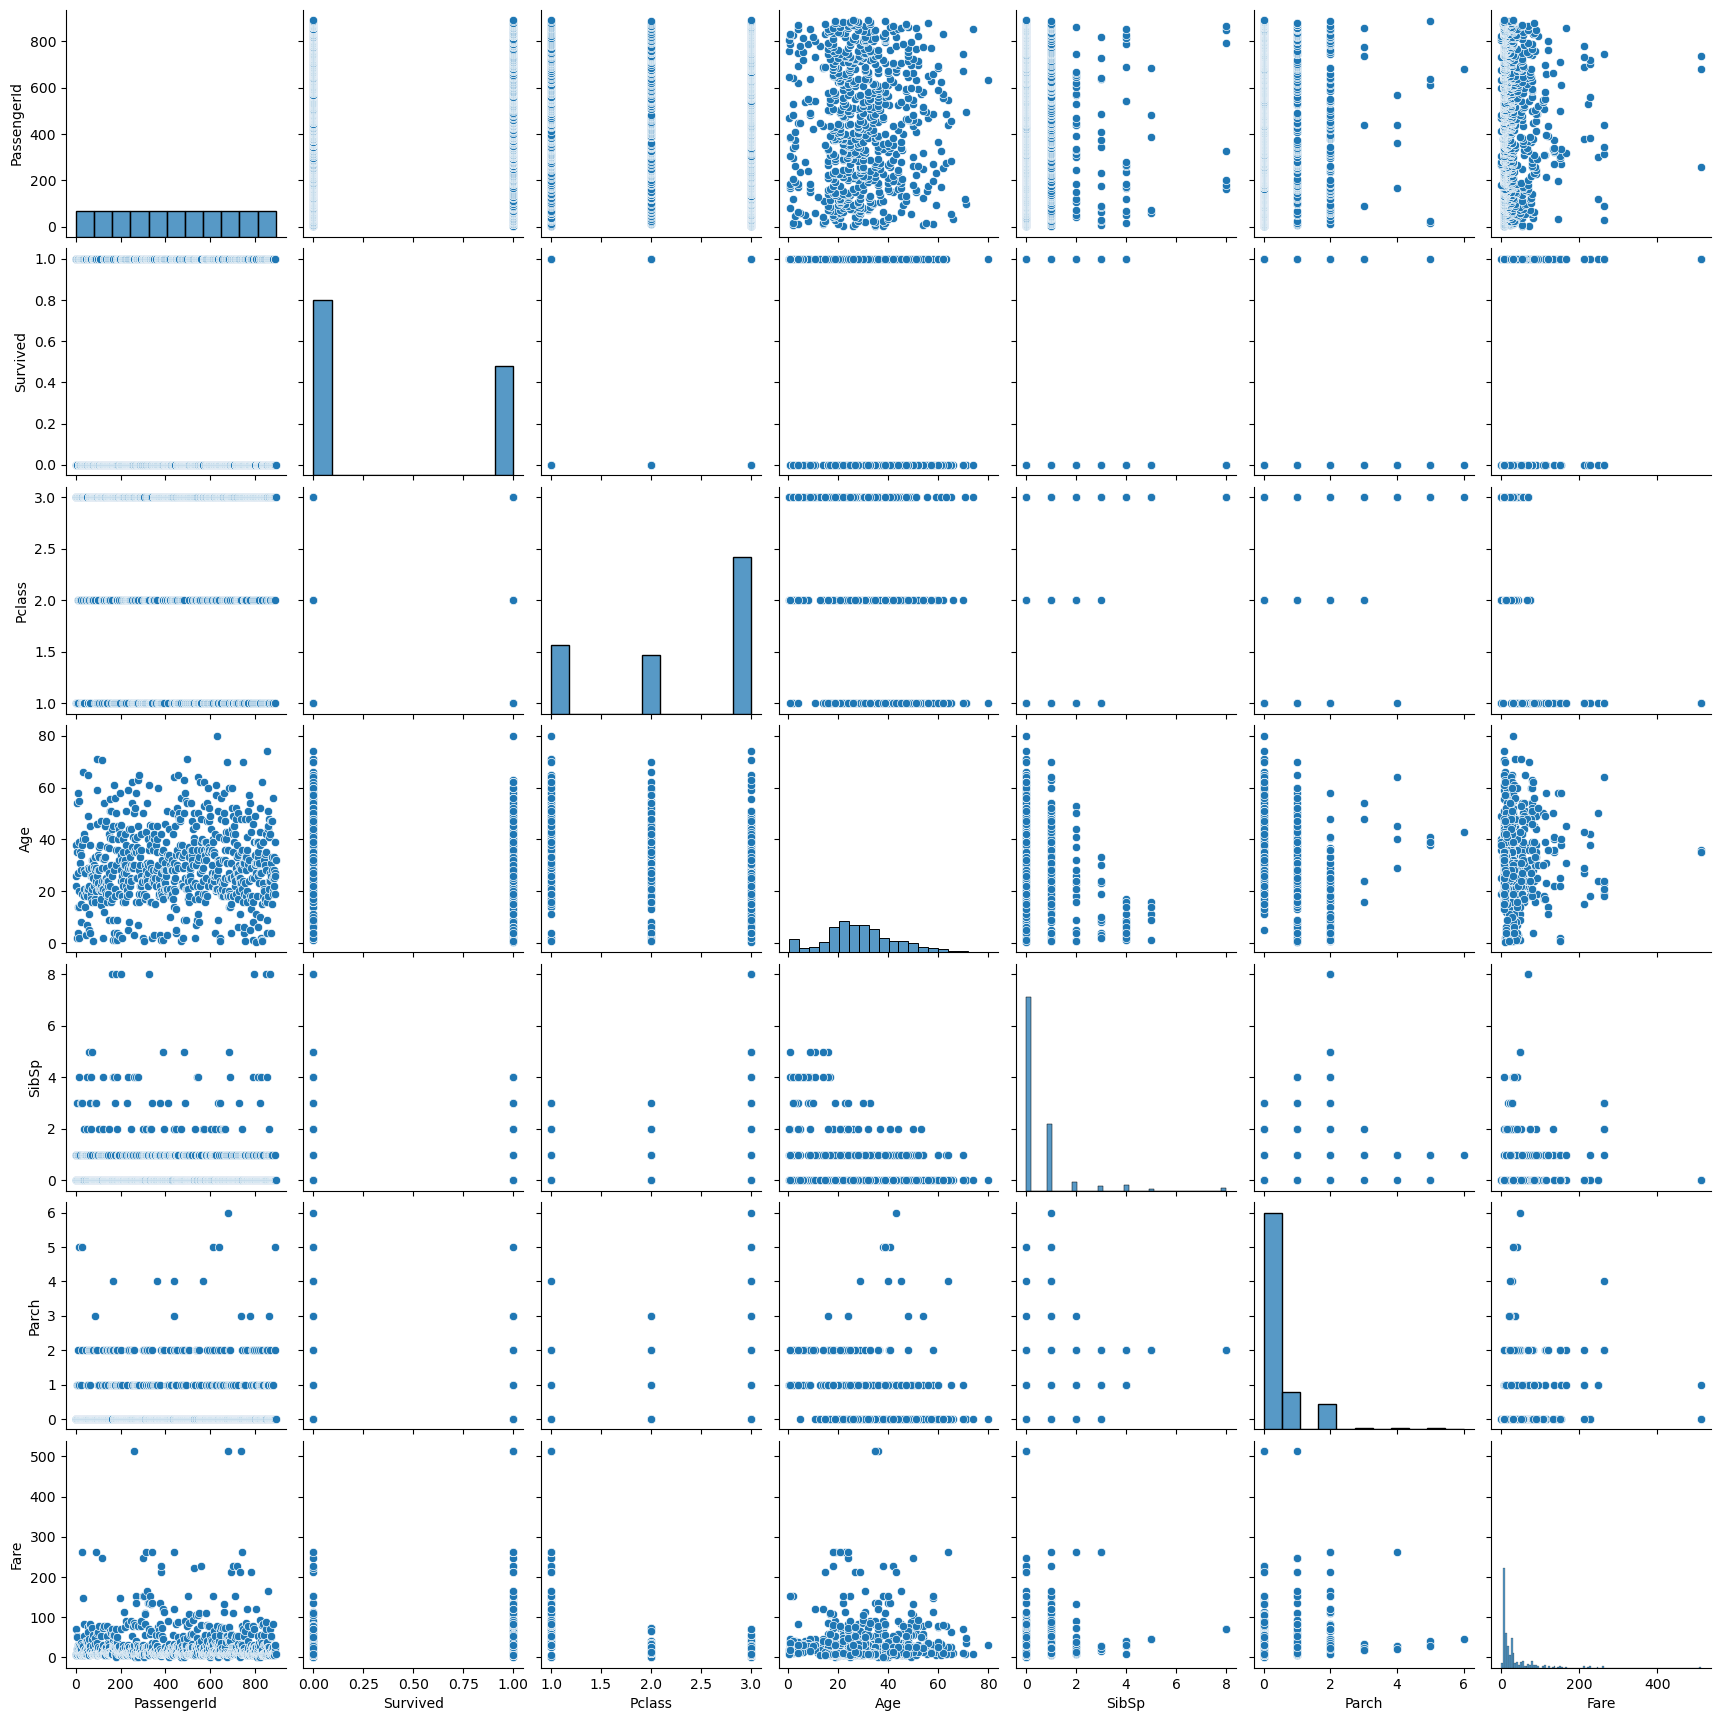

In [40]:
sns.pairplot(titanic)

Data Cleaning

In [14]:
titanic['Age'].mean()

29.69911764705882

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
impute = SimpleImputer(missing_values = np.NAN, strategy = "mean")

In [17]:
titanic['Age'] = impute.fit_transform((titanic['Age']).values.reshape(-1,1))

In [18]:
titanic['Age'] = titanic['Age'].round(1)

In [104]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
impute_embarked = SimpleImputer(missing_values = np.NAN , strategy = "most_frequent")

In [20]:
titanic['Embarked'] = impute_embarked.fit_transform((titanic['Embarked']).values.reshape(-1,1))

In [21]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699327,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.001940,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.400000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [24]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.7,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [26]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

Here sex and embarked both are object dtype and have 2 and 3 unique values respectively therfore label encoding both.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()

In [105]:
titanic['Sex'] = label.fit_transform(titanic['Sex'])

In [106]:
titanic['Embarked'] = label.fit_transform(titanic['Embarked'])

In [107]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.000000,1.935438,2
1,1,1,0,38.0,1.0,0.000000,4.146318,0
2,1,3,0,26.0,0.0,0.000000,1.993730,2
3,1,1,0,35.0,1.0,0.000000,3.758647,2
4,0,3,1,35.0,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.0,0.000000,2.351335,2
887,1,1,0,19.0,0.0,0.000000,3.107233,2
888,0,3,0,29.7,1.0,1.259921,2.862294,2
889,1,1,1,26.0,0.0,0.000000,3.107233,0


Here in Sex column Female is encoded as 0 and Male is encoded as 1

Also,in Embarked column C is encoded as 0, Q is encoded as 1, S is encoded as 2. 

# Checking the Correlation Values

In [32]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069808,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331327,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084139,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069808,-0.331327,0.084139,1.000000,-0.232613,-0.179199,0.091558,-0.026769
SibSp,-0.035322,0.083081,-0.114631,-0.232613,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179199,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091558,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026769,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

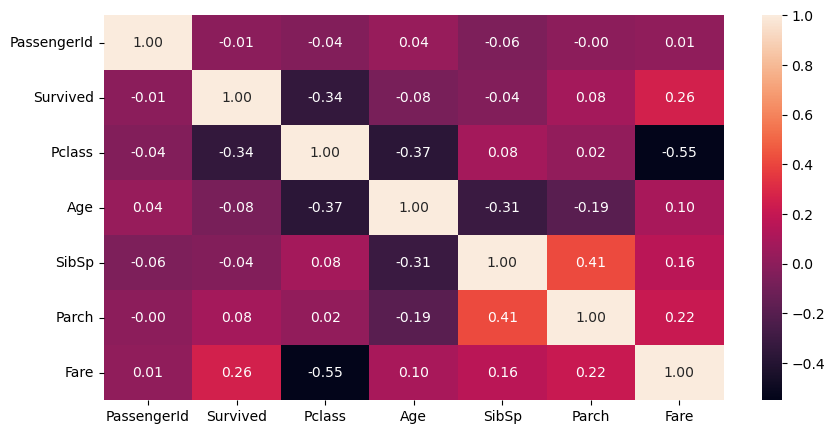

In [150]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.corr(),annot=True,fmt='.2f')

# Checking the skewness

In [33]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434486
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [34]:
col = ['Fare','SibSp','Parch']
for i in col:
    titanic[i] = np.cbrt(titanic[i])

In [71]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434486
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked   -1.264823
dtype: float64

# Checking the outliers

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(titanic))
threshold=3
print(np.where(z>3))

(array([ 27,  88,  96, 116, 118, 159, 180, 201, 258, 299, 311, 324, 341,
       380, 438, 493, 527, 557, 630, 672, 678, 679, 700, 716, 737, 742,
       745, 792, 846, 851, 863]), array([6, 6, 3, 3, 6, 4, 4, 4, 6, 6, 6, 4, 6, 6, 6, 3, 6, 6, 3, 3, 5, 6,
       6, 6, 6, 6, 3, 4, 4, 3, 4]))


In [73]:
df=titanic[(z<3).all(axis=1)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.000000,1.935438,2
1,1,1,0,38.0,1.0,0.000000,4.146318,0
2,1,3,0,26.0,0.0,0.000000,1.993730,2
3,1,1,0,35.0,1.0,0.000000,3.758647,2
4,0,3,1,35.0,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.0,0.000000,2.351335,2
887,1,1,0,19.0,0.0,0.000000,3.107233,2
888,0,3,0,29.7,1.0,1.259921,2.862294,2
889,1,1,1,26.0,0.0,0.000000,3.107233,0


In [74]:
print("Data Loss Percentage :",((titanic.shape[0]-df.shape[0])/titanic.shape[0])*100) 

Data Loss Percentage : 3.479236812570146


# Splitting the dataset

In [82]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [83]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.000000,1.935438,2
1,1,0,38.0,1.0,0.000000,4.146318,0
2,3,0,26.0,0.0,0.000000,1.993730,2
3,1,0,35.0,1.0,0.000000,3.758647,2
4,3,1,35.0,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0.0,0.000000,2.351335,2
887,1,0,19.0,0.0,0.000000,3.107233,2
888,3,0,29.7,1.0,1.259921,2.862294,2
889,1,1,26.0,0.0,0.000000,3.107233,0


In [84]:
y.value_counts()

0    530
1    330
Name: Survived, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Standardizing the dataset

In [86]:
st=StandardScaler()
x_scaled=st.fit_transform(x)
x_scaled

array([[ 0.8123649 ,  0.73379939, -0.58300832, ..., -0.53342677,
        -0.79489823,  0.57569379],
       [-1.61766575, -1.36277029,  0.69475708, ..., -0.53342677,
         1.56041269, -1.98957386],
       [ 0.8123649 , -1.36277029, -0.26356697, ..., -0.53342677,
        -0.73279811,  0.57569379],
       ...,
       [ 0.8123649 , -1.36277029,  0.03191628, ...,  2.09141599,
         0.19250694,  0.57569379],
       [-1.61766575,  0.73379939, -0.26356697, ..., -0.53342677,
         0.45344638, -1.98957386],
       [ 0.8123649 ,  0.73379939,  0.21559505, ..., -0.53342677,
        -0.74854851, -0.70694004]])

# Checking multicollinearity using Variance Inflation Factor

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,vif
0,Pclass,2.231133
1,Sex,1.124323
2,Age,1.256191
3,SibSp,1.397755
4,Parch,1.434564
5,Fare,2.570296
6,Embarked,1.045098


every column is in the acceptable range

# Balancing the data using SMOTE

In [88]:
from imblearn.over_sampling import SMOTE
smt= SMOTE()
x_smote,y_smote=smt.fit_resample(x_scaled,y)
y_smote.value_counts()

0    530
1    530
Name: Survived, dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=42)

In [90]:
x_train

array([[-0.40265043,  0.73379939,  0.5350364 , ..., -0.53342677,
        -0.35183238,  0.57569379],
       [ 0.8123649 ,  0.73379939,  0.03191628, ..., -0.53342677,
        -0.72168925,  0.57569379],
       [-1.61766575, -1.36277029,  0.13573472, ...,  2.09141599,
         2.98476755,  0.57569379],
       ...,
       [ 0.8123649 ,  0.73379939,  0.03191628, ..., -0.53342677,
        -0.74854851, -0.70694004],
       [ 0.8123649 ,  0.73379939,  0.19244696, ..., -0.53342677,
        -0.72490923,  0.57569379],
       [-1.61766575,  0.73379939,  1.24971114, ..., -0.53342677,
         1.14174923,  0.57569379]])

In [91]:
x_test

array([[-1.61766575, -1.36277029,  0.03191628, ..., -0.53342677,
         1.88698513, -1.98957386],
       [-0.40265043, -1.36277029, -0.58300832, ...,  1.54991231,
         0.41624975,  0.57569379],
       [ 0.8123649 , -1.36277029, -1.06217035, ...,  2.09141599,
         0.98507924,  0.57569379],
       ...,
       [-0.40265043, -1.36277029, -0.82258934, ..., -0.53342677,
         0.29925467,  0.57569379],
       [ 0.8123649 , -1.36277029,  0.69475708, ...,  3.02903294,
         0.50371181,  0.57569379],
       [ 0.8123649 ,  0.73379939, -0.26356697, ..., -0.53342677,
        -0.26171136, -1.98957386]])

In [92]:
Model= [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC(),GaussianNB()]

In [96]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = .30, random_state=i)
    for m in Model:
        maxAcc = 0
        maxRs = 0
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.7610062893081762 on Random State: 49


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = .30, random_state=49)

In [98]:
from sklearn.model_selection import cross_val_score
for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(f" Accuracy score is: {accuracy_score(y_test,predm)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    score = cross_val_score(m,x,y,cv=5)
    print('\n',f"Cross val score: {score.mean()*100:.2f}")
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,predm)-score.mean())*100:.2f}')
    print('\n')

LogisticRegression()
 Accuracy score is: 76.73

 Confusion matrix: 
 [[127  34]
 [ 40 117]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       161
           1       0.77      0.75      0.76       157

    accuracy                           0.77       318
   macro avg       0.77      0.77      0.77       318
weighted avg       0.77      0.77      0.77       318


 Cross val score: 78.60

 Difference between accuracy score and cross val score -1.88


RandomForestClassifier()
 Accuracy score is: 80.82

 Confusion matrix: 
 [[136  25]
 [ 36 121]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       161
           1       0.83      0.77      0.80       157

    accuracy                           0.81       318
   macro avg       0.81      0.81      0.81       318
weighted avg       0.81      0.81      0.81       318


 Cross val sco

HyperParamter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
rf=RandomForestClassifier()
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100,200),
      'criterion':['gini','entropy'],}
gsv=GridSearchCV(rf,param,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}

In [101]:
final_model=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=10)
final_model.fit(x_train, y_train)
f_pred = final_model.predict(x_test)
f_acc = (accuracy_score(y_test, f_pred))*100
print("Accuracy score for the Best Model is:", f_acc)
print("Confusion Matrix",confusion_matrix(y_test,f_pred))
print("Classification Report",classification_report(y_test,f_pred))

Accuracy score for the Best Model is: 84.59119496855347
Confusion Matrix [[145  16]
 [ 33 124]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.90      0.86       161
           1       0.89      0.79      0.84       157

    accuracy                           0.85       318
   macro avg       0.85      0.85      0.85       318
weighted avg       0.85      0.85      0.85       318



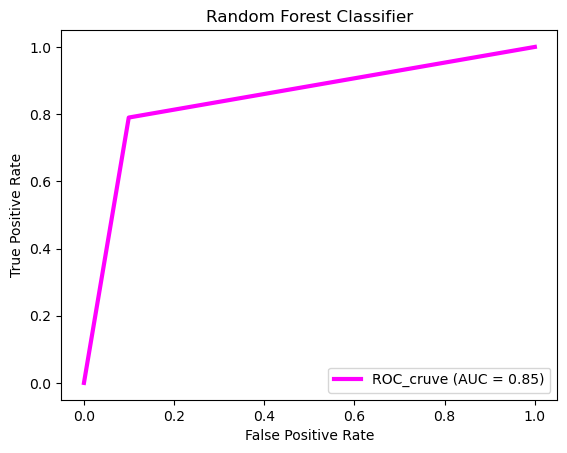

In [103]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,f_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=3,color='magenta')
plt.title('Random Forest Classifier')
plt.show()

In [ ]:
#Saving the model
import joblib 
joblib.dump(final_model,'titanic.pkl')